In [98]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
day_data = pd.read_csv("data/day.csv")
hour_data = pd.read_csv("data/hour.csv")

In [100]:
dd = day_data.copy()
hd = hour_data.copy()

In [101]:
print(dd.shape)
print(hd.shape)

(731, 16)
(17379, 17)


In [102]:
display(dd.head(10))
display(hd.head(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [103]:
dd.drop(['instant', 'yr', 'mnth', 'season'], axis=1, inplace=True)
hd.drop(['instant', 'yr', 'mnth', 'season'], axis=1, inplace=True)

In [104]:
# Renaming the columns

# dd.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'cnt': 'count'}, inplace=True)
# hd.rename({'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather', 'cnt': 'count'}, inplace=True)
dd.rename(columns={'dteday': 'date', 'cnt': 'count'}, inplace=True)
hd.rename(columns={'dteday': 'date', 'hr': 'hour',
          'cnt': 'count'}, inplace=True)

In [105]:
dd.tail(10)

,date,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
721,2012-12-22,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,2012-12-23,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,2012-12-24,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,2012-12-25,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,2012-12-26,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,2012-12-27,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [106]:
print(dd.dtypes)
print(hd.dtypes)

date           object
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
date           object
hour            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [107]:
# Convertin strings to pandas datetime object

dd["date"] = pd.to_datetime(dd["date"])
hd["date"] = pd.to_datetime(hd["date"])

In [108]:
# Unnormalizing the values

# x_n * (x_max - x_min) + x_min = x

dd['temp'] = dd['temp'] * (39 + 8) - 8
dd['atemp'] = dd['atemp'] * (50 + 16) - 16
dd['hum'] = dd['hum'] * (100)
dd['windspeed'] = dd['windspeed'] * 67

hd['temp'] = hd['temp'] * (39 + 8) - 8
hd['atemp'] = hd['atemp'] * (50 + 16) - 16
hd['hum'] = hd['hum'] * (100)
hd['windspeed'] = hd['windspeed'] * 67

In [109]:
# Converting binary values to boolean

dd["workingday"] = dd["workingday"].astype("bool")
hd["workingday"] = hd["workingday"].astype("bool")
dd["holiday"] = dd["holiday"].astype("bool")
hd["holiday"] = hd["holiday"].astype("bool")

In [110]:
# Checking for 0 values

print((dd["weathersit"][dd["weathersit"] == 0]).count())
print((dd["temp"][dd["temp"] == 0]).count())
print((dd["atemp"][dd["atemp"] == 0]).count())
print((dd["hum"][dd["hum"] == 0]).count())
print((dd["windspeed"][dd["windspeed"] == 0]).count())

0
0
0
1
0


In [111]:
print((hd["weathersit"][hd["weathersit"] == 0]).count())
print((hd["temp"][hd["temp"] == 0]).count())
print((hd["atemp"][hd["atemp"] == 0]).count())
print((hd["hum"][hd["hum"] == 0]).count()) 
print((hd["windspeed"][hd["windspeed"] == 0]).count())

0
0
0
22
2180


In [112]:
# # Replacing 0 Humidity with mean of hum of neighboring days
# i_0 = dd.loc[dd['hum'] == 0].index[0]
# dd.loc[i_0, 'hum'] = (dd.iloc[i_0 + 1]['hum'] + dd.iloc[i_0 - 1]['hum']) / 2

# # Replacing 0 Humidity with the average humidity of the day
# hd.loc[hd['hum'] == 0, 'hum'] = dd.loc[i_0, 'hum']


In [113]:
# Checking for NaN values
print(dd.isna().sum())
print(hd.isna().sum())

date          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
date          0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [114]:
# Checking if the count is correct
print((dd["count"] == dd["registered"] + dd["casual"]).count() == dd.shape[0])
print((hd["count"] == hd["registered"] + hd["casual"]).count() == hd.shape[0])

True
True


In [115]:
def categorize_season(date):
    month = date.month
    if 2 < month < 6:
        return 'Spring'
    if 5 < month < 9:
        return 'Summer'
    if 8 < month < 12:
        return 'Fall'
    else:
        return 'Winter'

In [116]:
dd['season'] =  pd.Categorical(dd['date'].apply(categorize_season))
hd['season'] =  pd.Categorical(hd['date'].apply(categorize_season))

In [117]:
# Convert the values from numbers to string

weather_types = ['Clear', 'Mist', 'Mixed', 'Severe']
for i in range(0, 4):
    dd.loc[dd['weathersit'] == i + 1, 'weather'] = weather_types[i]
    hd.loc[hd['weathersit'] == i + 1, 'weather'] = weather_types[i]


In [118]:
dd['weather'] = pd.Categorical(dd['weather'])
hd['weather'] = pd.Categorical(hd['weather'])
dd['weekday'] = pd.Categorical(dd['date'].dt.day_name())
hd['weekday'] = pd.Categorical(hd['date'].dt.day_name())

In [119]:
dd["month"] = dd["date"].dt.month_name()
hd["month"] = hd["date"].dt.month_name()

In [120]:
dd.drop(["weathersit"], axis=1, inplace=True)
hd.drop(["weathersit"], axis=1, inplace=True)

In [121]:
hd['datetime'] = hd['date'] + hd['hour'].astype('timedelta64[h]')
hd.drop('date', axis=1, inplace=True)
display(hd['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: datetime, Length: 17379, dtype: datetime64[ns]

In [122]:
hd.dtypes

hour                   int64
holiday                 bool
weekday             category
workingday              bool
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
season              category
weather             category
month                 object
datetime      datetime64[ns]
dtype: object

In [123]:
# Getting the humidity data from Historical Weather API
# Making a request 

import requests
response = requests.get(url="https://archive-api.open-meteo.com/v1/archive?latitude=38.8951&longitude=-77.0364&start_date=2011-01-01&end_date=2012-12-31&hourly=relativehumidity_2m,rain&daily=rain_sum,snowfall_sum&timezone=America%2FNew_York")
response.raise_for_status()

In [124]:
# Reading json and converting it to DataFrame

api_data = pd.read_json(response.text)
hourly_time = pd.to_datetime(pd.Series(api_data['hourly'][0]))
hourly_hum = pd.Series(api_data['hourly'][1]) 
hourly_rain = pd.Series(api_data['hourly'][2])
daily_time = pd.to_datetime(pd.Series(api_data['daily'][0]))
daily_rain = pd.Series(api_data['daily'][3])
daily_snow = pd.Series(api_data['daily'][4])
hour_frame = {
    'datetime': hourly_time,
    'humidity': hourly_hum,
    'rain': hourly_rain
}
day_frame = {
    'date': daily_time,
    'rain': daily_rain,
    'snow': daily_snow
}                         
api_hour_data = pd.DataFrame(hour_frame)
api_day_data = pd.DataFrame(day_frame)
display(api_hour_data)
display(api_day_data)    

,datetime,humidity,rain
0,2011-01-01 00:00:00,93,0.0
1,2011-01-01 01:00:00,94,0.0
2,2011-01-01 02:00:00,96,0.0
3,2011-01-01 03:00:00,96,0.0
4,2011-01-01 04:00:00,98,0.0
...,...,...,...
17539,2012-12-31 19:00:00,54,0.0
17540,2012-12-31 20:00:00,54,0.0
17541,2012-12-31 21:00:00,54,0.0
17542,2012-12-31 22:00:00,55,0.0


,date,rain,snow
0,2011-01-01,2.5,0.00
1,2011-01-02,3.0,0.00
2,2011-01-03,0.0,0.00
3,2011-01-04,0.0,0.00
4,2011-01-05,0.0,0.00
...,...,...,...
726,2012-12-27,1.6,0.00
727,2012-12-28,0.0,0.00
728,2012-12-29,2.7,2.87
729,2012-12-30,0.0,0.00


In [125]:
# Looking for missing hours in the original hour data

start_date = hd['datetime'].min()
end_date = hd['datetime'].max()
continuous_range = pd.date_range(start=start_date, end=end_date, freq='H')
missing_hours = continuous_range[~continuous_range.isin(hd['datetime'])]
display(missing_hours)

DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-10-30 07:00:00', '2012-10-30 08:00:00',
               '2012-10-30 09:00:00', '2012-10-30 10:00:00',
               '2012-10-30 11:00:00', '2012-10-30 12:00:00',
               '2012-11-08 03:00:00', '2012-11-29 03:00:00',
               '2012-12-24 04:00:00', '2012-12-25 03:00:00'],
              dtype='datetime64[ns]', length=165, freq=None)

In [126]:
# Merging the original dataset with the retreived weather data
hd = pd.merge(hd, api_hour_data, how='inner', on='datetime')
dd = pd.merge(dd, api_day_data, how='inner', on='date')

In [127]:
dd.head()

,date,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month,rain,snow
0,2011-01-01,False,Saturday,False,8.175849,7.999250,80.5833,10.749882,331,654,985,Winter,Mist,January,2.5,0.0
1,2011-01-02,False,Sunday,False,9.083466,7.346774,69.6087,16.652113,131,670,801,Winter,Mist,January,3.0,0.0
2,2011-01-03,False,Monday,True,1.229108,-3.499270,43.7273,16.636703,120,1229,1349,Winter,Clear,January,0.0,0.0
3,2011-01-04,False,Tuesday,True,1.400000,-1.999948,59.0435,10.739832,108,1454,1562,Winter,Clear,January,0.0,0.0
4,2011-01-05,False,Wednesday,True,2.666979,-0.868180,43.6957,12.522300,82,1518,1600,Winter,Clear,January,0.0,0.0


In [128]:
# Replacing humidity values with new ones and leaving one humidity column

hd['hum'] = hd['humidity']
hd.drop('humidity', axis=1, inplace=True)

In [129]:
# Replacing humidity values in day data with the average of the day humidity from hour data 

dd['hum'] = np.round(hd.groupby(hd['datetime'].dt.date)['hum'].mean().values, 2)
dd.head()

,date,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month,rain,snow
0,2011-01-01,False,Saturday,False,8.175849,7.999250,92.33,10.749882,331,654,985,Winter,Mist,January,2.5,0.0
1,2011-01-02,False,Sunday,False,9.083466,7.346774,75.09,16.652113,131,670,801,Winter,Mist,January,3.0,0.0
2,2011-01-03,False,Monday,True,1.229108,-3.499270,42.82,16.636703,120,1229,1349,Winter,Clear,January,0.0,0.0
3,2011-01-04,False,Tuesday,True,1.400000,-1.999948,58.09,10.739832,108,1454,1562,Winter,Clear,January,0.0,0.0
4,2011-01-05,False,Wednesday,True,2.666979,-0.868180,59.74,12.522300,82,1518,1600,Winter,Clear,January,0.0,0.0


In [130]:
# Creating a new column israin where True mean more than 0 rain precipitation 

hd['israin'] = (hd['rain'] > 0)

In [131]:
dd['israin'] = (dd['rain'] > 0)
dd['issnow'] = (dd['snow'] > 0)

In [132]:
sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    }) 

In [133]:
def convert_to_k(ax):
    '''Function for converting ylabels count from thousands to k'''
    ylabels = ["{:,.0f}".format(y) + "K" for y in ax.get_yticks() / 1000]
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ylabels)

In [134]:
def hide_spines(ax):
    [ax.spines[spine].set_visible(False)
    for spine in ["top", "right", "bottom", "left"]]

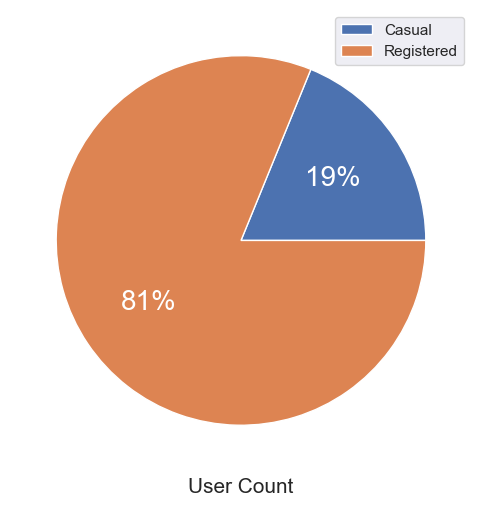

In [135]:
fig, ax = plt.subplots(figsize=(6, 6))

labels = ['Casual', 'Registered']
users = [dd['casual'].sum(), dd['registered'].sum()]
plt.pie(users, autopct='%.0f%%', textprops={'fontsize': 20, 'color': 'w'})
plt.legend(labels=labels)
plt.xlabel('User Count')
plt.show()

Text(0.5, 0, 'Month')

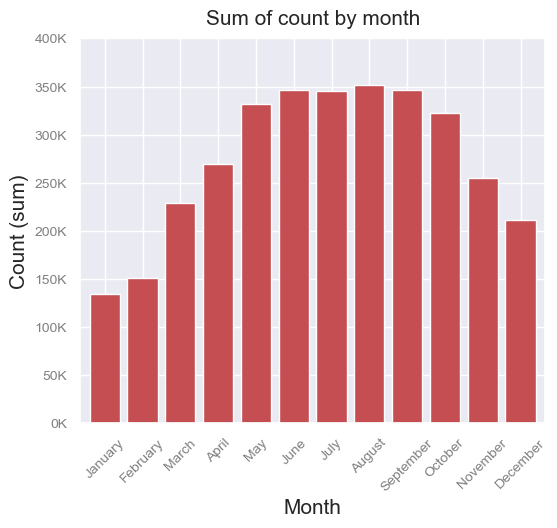

In [136]:
fig, ax = plt.subplots(figsize=(6, 5))

dd.groupby("month", sort=False)["count"].sum().plot(
    kind="bar", width=0.8, color="r", ax=ax
)
convert_to_k(ax)
plt.title("Sum of count by month")
plt.xticks(rotation=45)
plt.ylabel("Count (sum)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

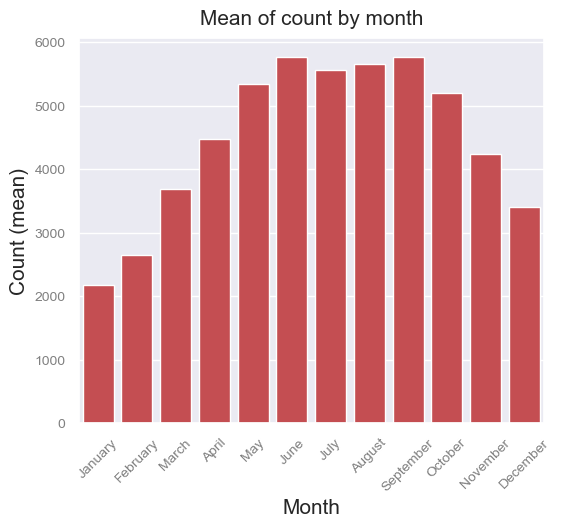

In [137]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.barplot(
    data=dd,
    x="month",
    y="count",
    estimator="mean",
    color="#c44e52",
    saturation=1,
    errorbar=None,
    ax=ax,
)
plt.title("Mean of count by month")
plt.xticks(rotation=45)
plt.ylabel("Count (mean)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

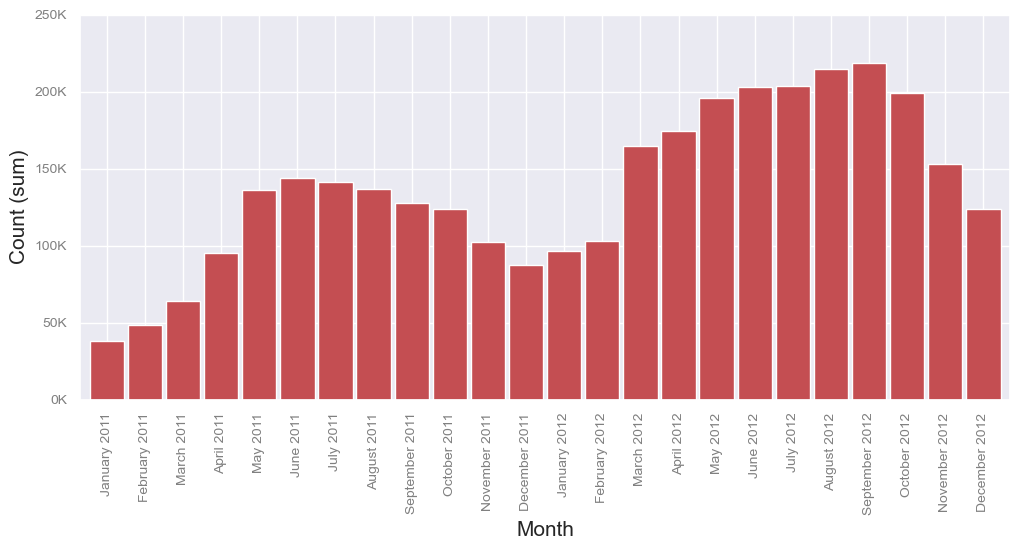

In [138]:
fig, ax = plt.subplots(figsize=(12, 5))

months = dd.groupby(pd.Grouper(key="date", freq='M'))
months["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='r',
    ax=ax
)
convert_to_k(ax)

xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
plt.xticks(rotation=90)

plt.ylabel("Count (sum)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

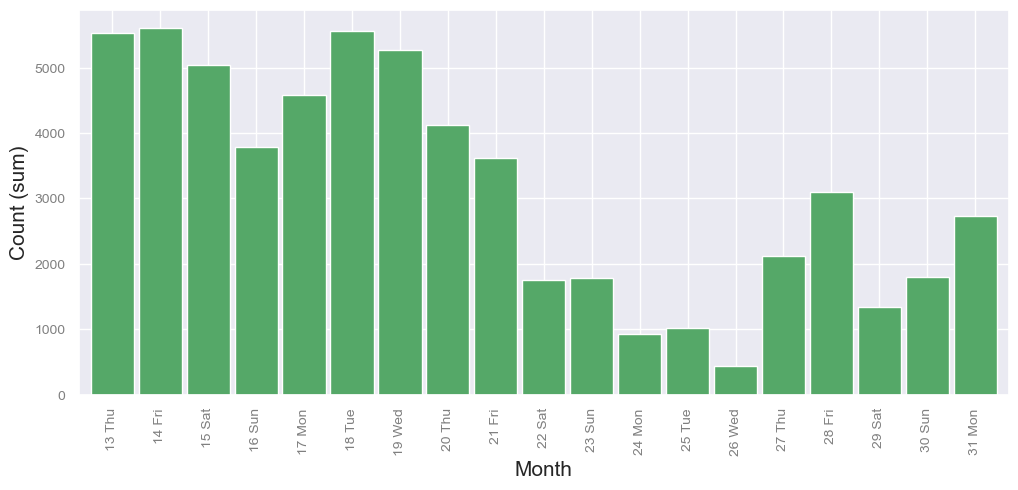

In [139]:
fig, ax = plt.subplots(figsize=(12, 5))

days = dd[dd['date'] > '2012-12-12'].groupby(pd.Grouper(key="date", freq='D'))
days["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='g',
    ax=ax
)
# convert_to_k(ax)

xlabels = [d.strftime('%d %a') for d, g in days]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
plt.xticks(rotation=90)

plt.ylabel("Count (sum)")
plt.xlabel("Month")

Text(0.5, 0, 'Hour')

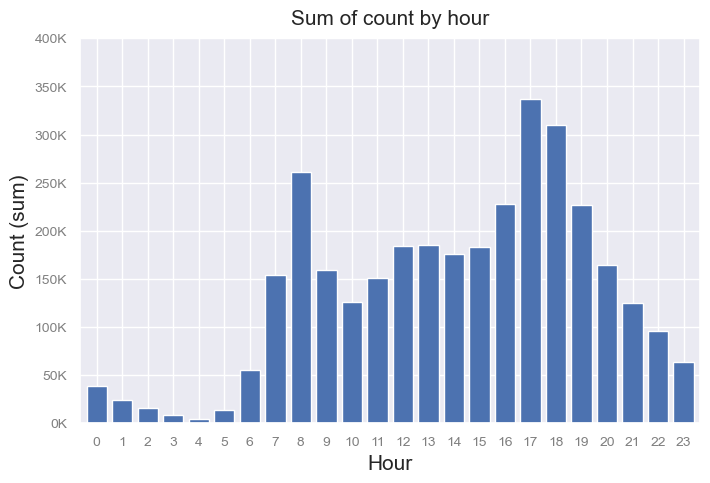

In [140]:
fig, ax = plt.subplots(figsize=(8, 5))

hd.groupby("hour", sort=False)["count"].sum().plot(
    kind="bar", width=0.8, color="b", ax=ax
)

convert_to_k(ax)

plt.title("Sum of count by hour")
plt.xticks(
    rotation=0,
    fontsize=10,
    color="grey",
)

plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

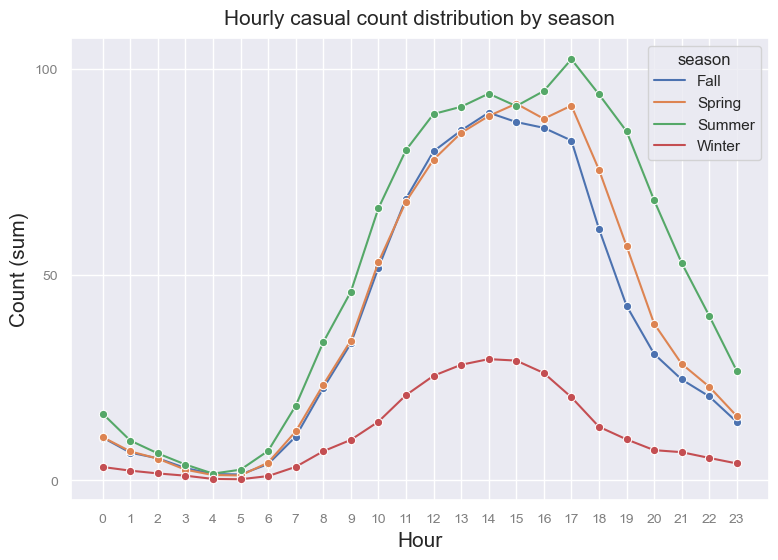

In [141]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='season',
    color="#c44e52",
    errorbar=None,
    marker='o',
    ax=ax,
)


ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 150, 50))
plt.title("Hourly casual count distribution by season")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

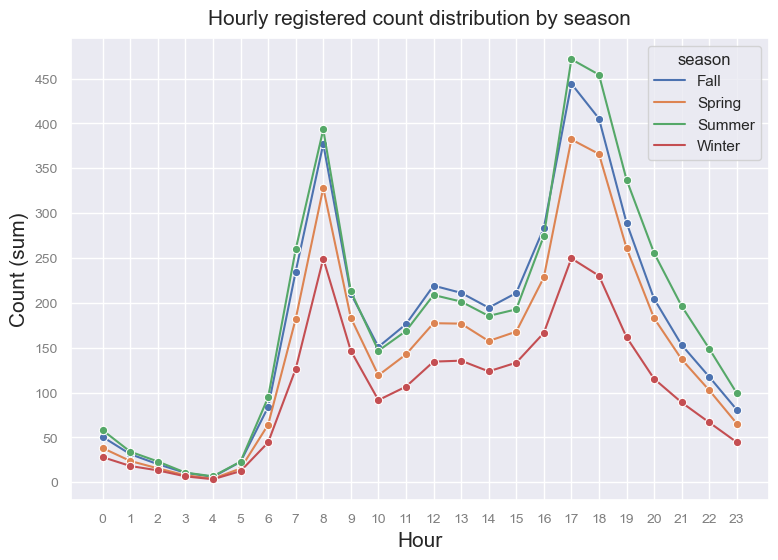

In [142]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    estimator="mean",
    hue='season',
    color="#c44e52",
    errorbar=None,
    marker='o',
    ax=ax,
)


ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 500, 50))
plt.title("Hourly registered count distribution by season")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

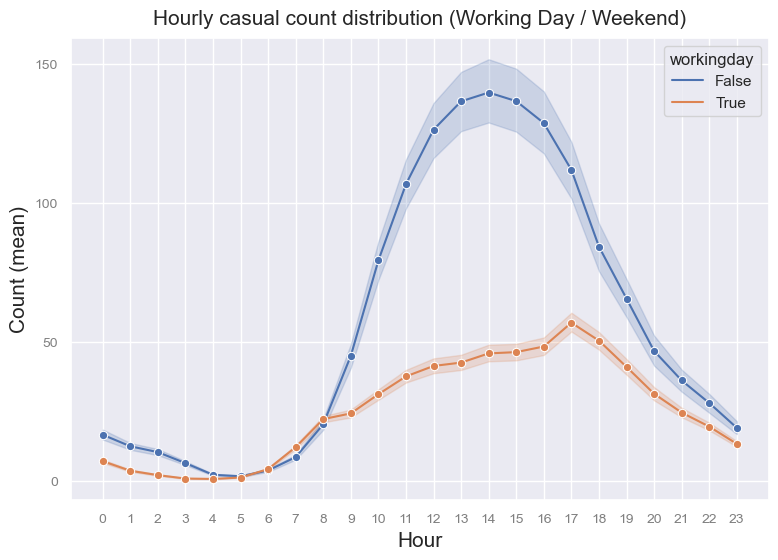

In [143]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    hue='workingday',
    estimator="mean",
    color="#c44e52",
    # errorbar=None,
    marker='o',
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)

ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 200, 50))
plt.title("Hourly casual count distribution (Working Day / Weekend)")

plt.ylabel("Count (mean)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

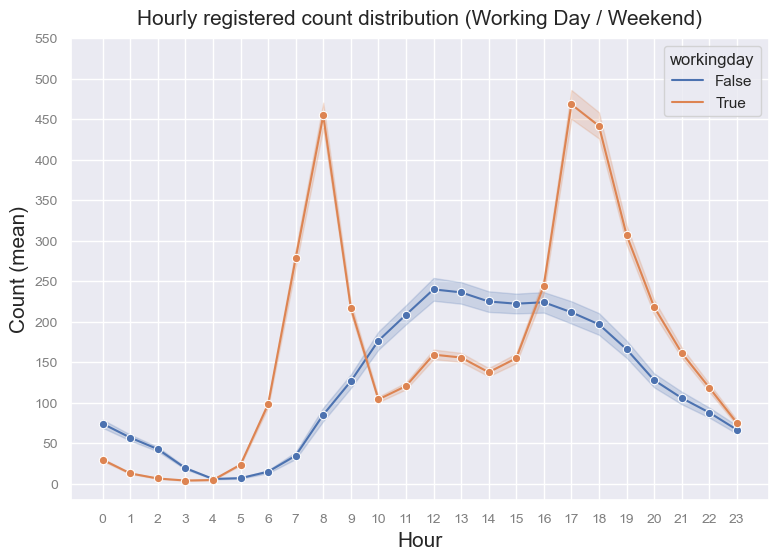

In [144]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='workingday',
    estimator="mean",
    color="#c44e52",
    # errorbar=None,
    marker='o',
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)

ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 600, 50))
plt.title("Hourly registered count distribution (Working Day / Weekend)")
plt.ylabel("Count (mean)")
plt.xlabel("Hour")

Text(0.5, 1.0, 'Casual')

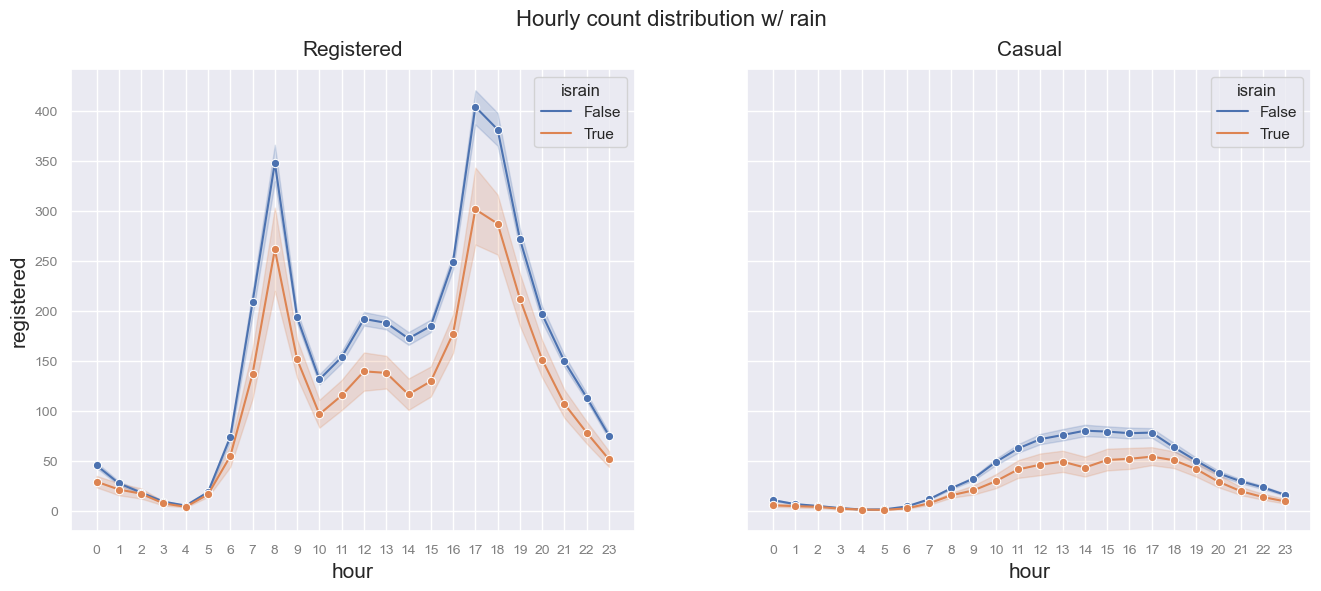

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='israin',
    estimator="mean",
    color="#c44e52",
    # errorbar=None,
    marker='o',
    ax=ax[0],
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)

ax[0].set_xticks(np.arange(0, 24, 1))
ax[0].set_title("Registered")
ax[0].set_yticks(np.arange(0, 450, 50))

sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    hue='israin',
    estimator="mean",
    color="#c44e52",
    # errorbar=None,
    marker='o',
    ax=ax[1],
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)
fig.suptitle('Hourly count distribution w/ rain', fontsize=16)
ax[1].set_xticks(np.arange(0, 24, 1))
ax[1].set_title("Casual")
# ax[1].set_yticks(np.arange(0, 100, 50))
# plt.title("Hourly count distribution (Working Day / Weekend)")

# plt.ylabel("Count (mean)")
# plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

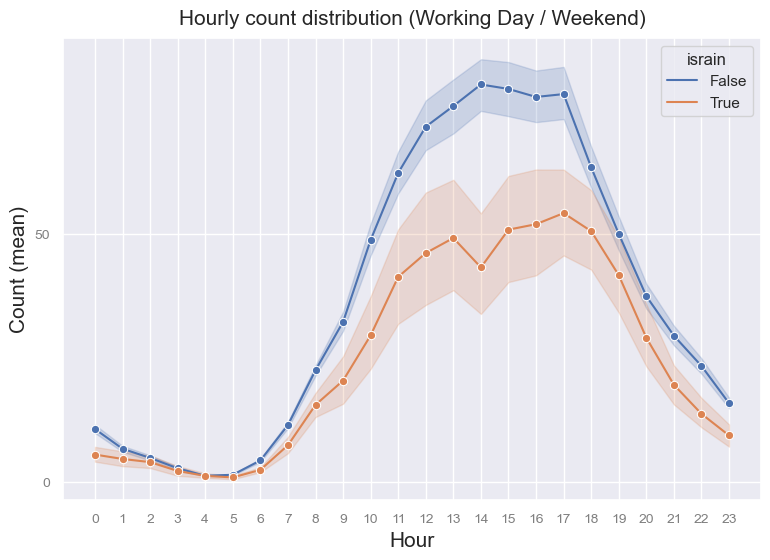

In [146]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    hue='israin',
    estimator="mean",
    color="#c44e52",
    # errorbar=None,
    marker='o',
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)

ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 100, 50))
plt.title("Hourly count distribution (Working Day / Weekend)")

plt.ylabel("Count (mean)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

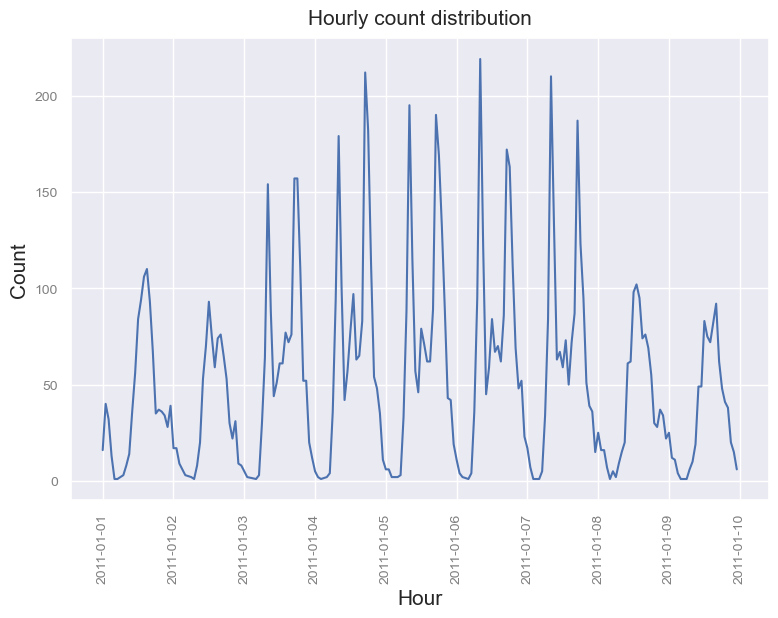

In [147]:
fig, ax = plt.subplots(figsize=(9, 6))

end='2011-01-10 00:00:00'

sns.lineplot(
    data=hd,
    x=hd[hd['datetime']<end]['datetime'],
    y="count",
    color="b",
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# 
ax.set_xticks(pd.date_range(start='2011-01-01 00:00:00', end=end, freq='D'))
plt.title("Hourly count distribution")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.xlabel("Hour")

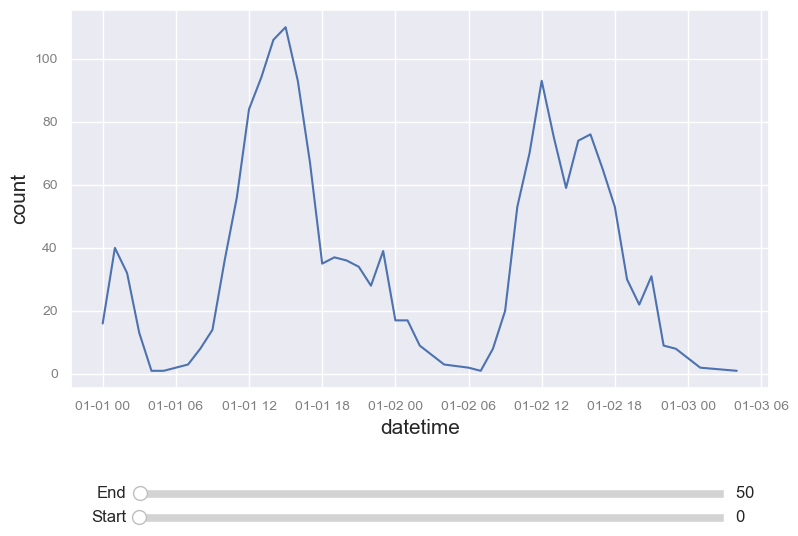

In [148]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots(figsize=(9, 6))

date_rng = pd.date_range(start='2011-01-01', end='2011-12-31', freq='D')
end='2011-12-10 00:00:00'

start_idx = 0
end_idx = 50

plot = sns.lineplot(
    data=hd,
    x=hd['datetime'][start_idx:end_idx],
    y=hd["count"][start_idx:end_idx],
    color="b",
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# 
plt.subplots_adjust(bottom=0.25)
ax_slider_start = plt.axes([0.2, 0.02, 0.65, 0.03])
ax_slider_end = plt.axes([0.2, 0.06, 0.65, 0.03])

slider_start = Slider(ax_slider_start, 'Start', 0, len(hd) - 1, valinit=start_idx)
slider_end = Slider(ax_slider_end, 'End', 0, len(hd) - 1, valinit=end_idx)

def update(val):
    start_idx = int(slider_start.val)
    end_idx = int(slider_end.val)
    plot.set_xdata(hd['datetime'][start_idx:end_idx])
    plot.set_ydata(hd['count'][start_idx:end_idx])
    plt.draw()


# ax.set_xticks(pd.date_range(start='2011-01-01 00:00:00', end=end, freq='D'))
# plt.title("Hourly count distribution")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.xlabel("Hour")

slider_start.on_changed(update)
slider_end.on_changed(update)

plt.show()

Text(0.5, 0, 'Hour')

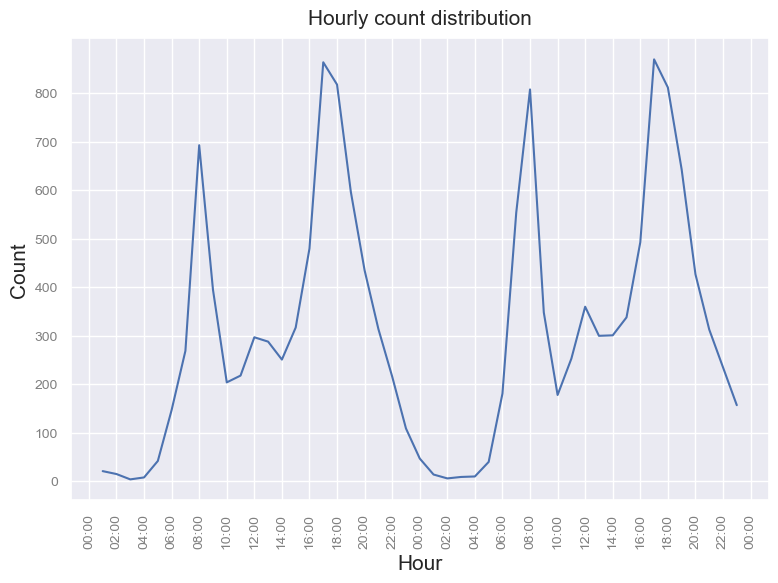

In [149]:
fig, ax = plt.subplots(figsize=(9, 6))
start = "2012-08-28 00:00:00"
end = "2012-08-30 00:00:00"
sns.lineplot(
    data=hd,
    x=hd[
        (hd["datetime"] < end)
        & (hd["datetime"] > start)
    ]["datetime"],
    y="count",
    color="b",
    ax=ax,
)


ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.set_yticks(np.arange(0, 900, 100))
ax.set_xticks(pd.date_range(start=start, end=end, freq='2H'))
plt.title("Hourly count distribution")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

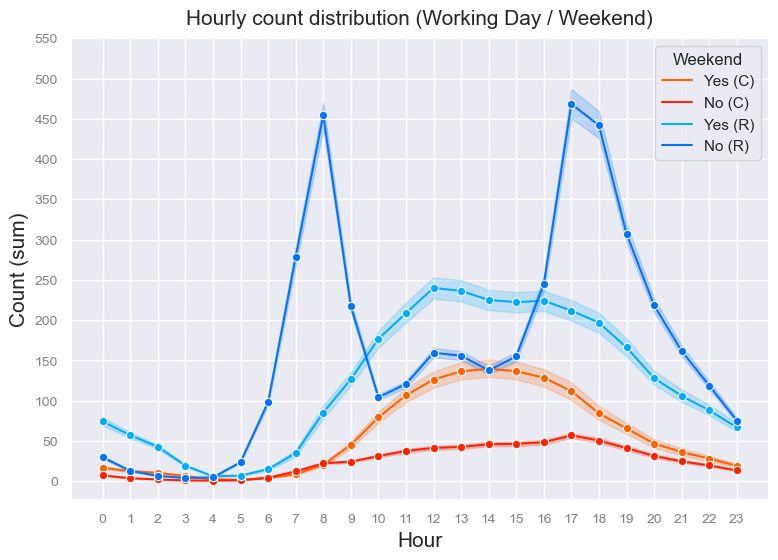

In [150]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='workingday',
    palette=['#ff6200', '#ff2200'],
    # errorbar=None,
    marker='o',
    ax=ax,
)
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='workingday',
    palette=['#00aeff', '#0073ff'],
    estimator="mean",
    color="g",
    # errorbar=None,
    marker='o',
    ax=ax,
)

ax.set_yticks(np.arange(0, 600, 50))
ax.set_xticks(np.arange(0, 24, 1))

L = ax.legend(title='Weekend')
[L.get_texts()[i].set_text(['Yes (C)', 'No (C)', 'Yes (R)', 'No (R)'][i]) for i in range(4)]

plt.title("Hourly count distribution (Working Day / Weekend)")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

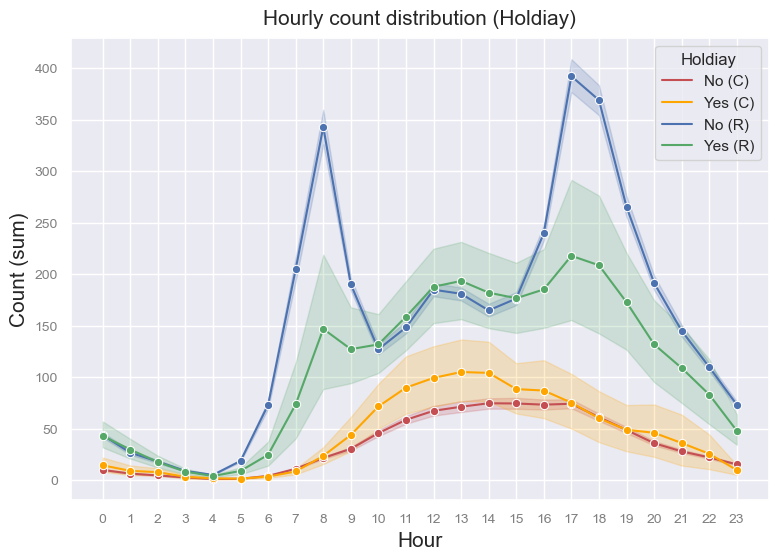

In [151]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='holiday',
    palette=['r', 'orange'],
    # errorbar=None,
    marker='o',
    ax=ax,
)
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='holiday',
    palette=['b', 'g'],
    estimator="mean",
    color="g",
    # errorbar=None,
    marker='o',
    ax=ax,
)

ax.set_yticks(np.arange(0, 450, 50))
ax.set_xticks(np.arange(0, 24, 1))

L = ax.legend(title='Holdiay')
[L.get_texts()[i].set_text(['No (C)', 'Yes (C)', 'No (R)', 'Yes (R)'][i]) for i in range(4)]

plt.title("Hourly count distribution (Holdiay)")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Weekday')

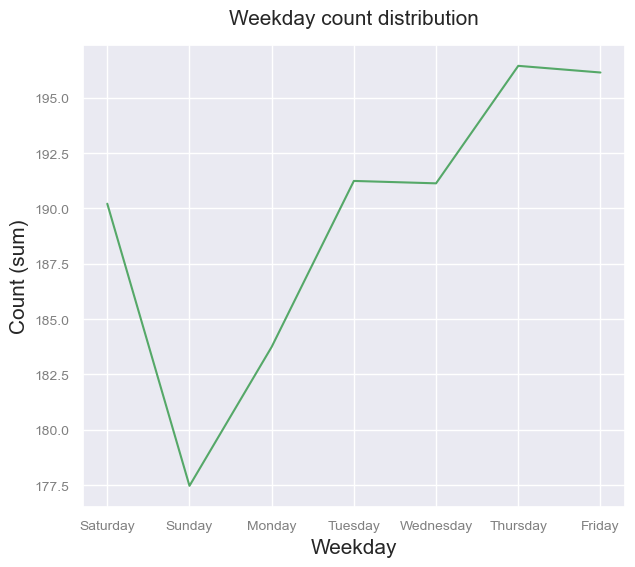

In [152]:
fig, ax = plt.subplots(figsize=(7, 6))

hd.groupby("weekday", sort=False)["count"].mean().plot(
    kind="line", 
    # width=0.8, 
    color="g", 
    ax=ax
)

# convert_to_k(ax)

plt.title("Weekday count distribution", fontsize=15, pad=15)
plt.xticks(rotation=0)

plt.ylabel("Count (sum)")
plt.xlabel("Weekday")

Text(0.5, 0, 'Weekday')

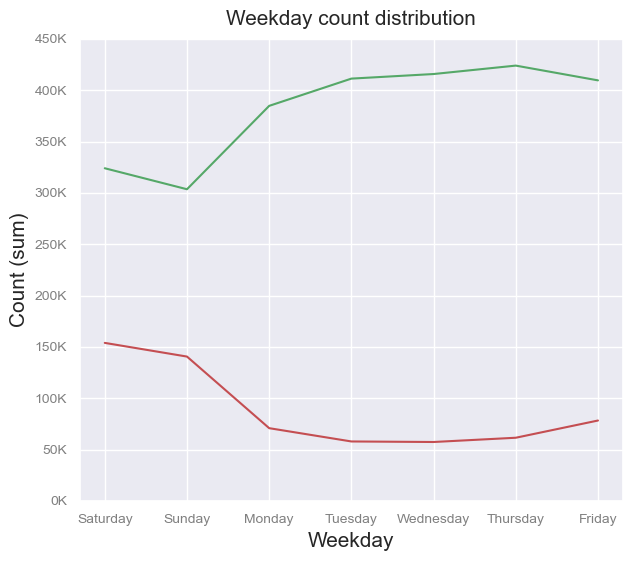

In [153]:
fig, ax = plt.subplots(figsize=(7, 6))

hd.groupby("weekday", sort=False)["casual"].sum().plot(
    kind="line", color="r", ax=ax
)
hd.groupby("weekday", sort=False)["registered"].sum().plot(
    kind="line", color="g", ax=ax
)

convert_to_k(ax)

plt.title("Weekday count distribution")
plt.ylabel("Count (sum)")
plt.xlabel("Weekday")

Text(0.5, 0, 'Weekday')

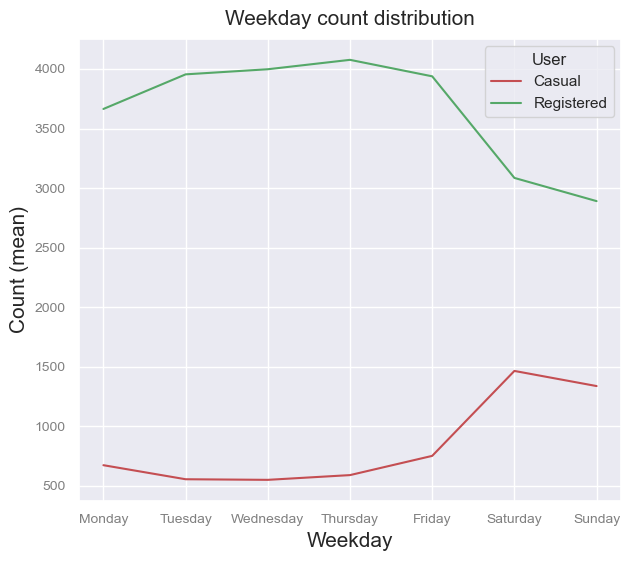

In [154]:
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
dd["weekday"] = pd.Categorical(dd["weekday"], categories=weekdays, ordered=True)
hd["weekday"] = pd.Categorical(hd["weekday"], categories=weekdays, ordered=True)

fig, ax = plt.subplots(figsize=(7, 6))

sns.lineplot(
    data=dd,
    x=dd["weekday"].sort_values(),
    y="casual",
    estimator="mean",
    errorbar=None,
    color="r",
    ax=ax,
)
sns.lineplot(
    data=dd,
    x=dd["weekday"].sort_values(),
    y="registered",
    estimator="mean",
    errorbar=None,
    color="g",
    ax=ax,
)

# convert_to_k(ax)

labels = ["Casual", "Registered"]
L = ax.legend(title="User", labels=labels)
# [L.set_label(['Casual', 'Registered'][i]) for i in range(2)]

plt.title("Weekday count distribution")
plt.ylabel("Count (mean)")
plt.xlabel("Weekday")

In [155]:
# Mean of the count during rainy and clear days

print(dd[dd['israin'] == True]['count'].mean())
print(dd[dd['israin'] == False]['count'].mean())


4297.282352941176
4684.406649616369


In [156]:
print(dd[dd['israin'] == True]['casual'].mean())
print(dd[dd['israin'] == False]['casual'].mean())
print(dd[dd['israin'] == True]['registered'].mean())
print(dd[dd['israin'] == False]['registered'].mean())

781.9852941176471
905.7340153452685
3515.2970588235294
3778.6726342711


In [157]:
# Mean of the count with and without snow

print(dd[dd['issnow'] == True]['count'].mean())
print(dd[dd['issnow'] == False]['count'].mean())

1685.3243243243244
4654.64265129683


In [158]:
print(dd[dd['issnow'] == True]['casual'].mean())
print(dd[dd['issnow'] == False]['casual'].mean())
print(dd[dd['issnow'] == True]['registered'].mean())
print(dd[dd['issnow'] == False]['registered'].mean())

139.67567567567568
885.949567723343
1545.6486486486488
3768.693083573487


Text(0, 0.5, 'Count (sum)')

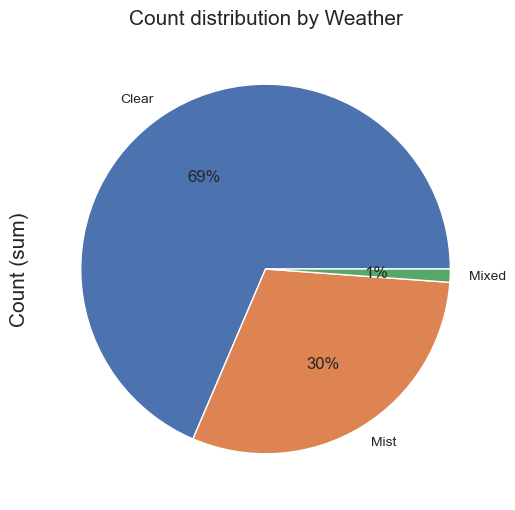

In [159]:
fig, ax = plt.subplots(figsize=(6, 6))

dd.groupby('weather')['count'].sum().plot(kind='pie', autopct='%.0f%%', ax=ax)

plt.title("Count distribution by Weather")
plt.ylabel("Count (sum)")

Text(0.5, 0, 'Weather')

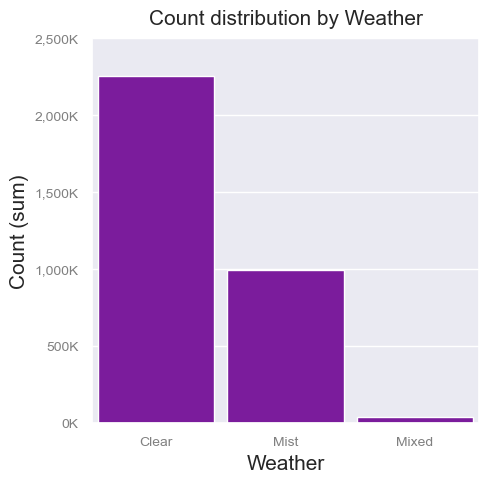

In [160]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=dd,
    x="weather",
    y="count",
    estimator="sum",
    color="#7b1c9c",
    saturation=1,
    errorbar=None,
    width=0.9,
    ax=ax,
)
convert_to_k(ax)

plt.title("Count distribution by Weather")
plt.ylabel("Count (sum)")
plt.xlabel("Weather")

Text(0.5, 0, 'Temp')

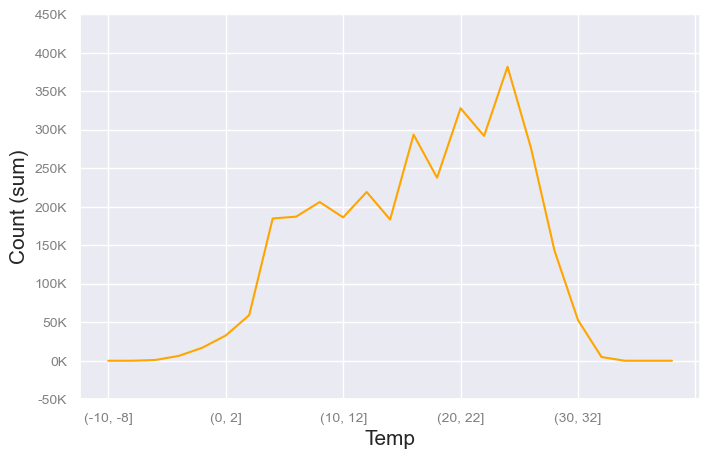

In [161]:
fig, ax = plt.subplots(figsize=(8, 5))

dd.groupby(pd.cut(dd["temp"], np.arange(-10, 41, 2)))["count"].sum().plot(
    kind="line", color='orange'
)
convert_to_k(ax)

# ax.set_xticks(np.arange(-10, 41, 1))
plt.ylabel("Count (sum)")
plt.xlabel("Temp")

Text(0.5, 0, 'Temp')

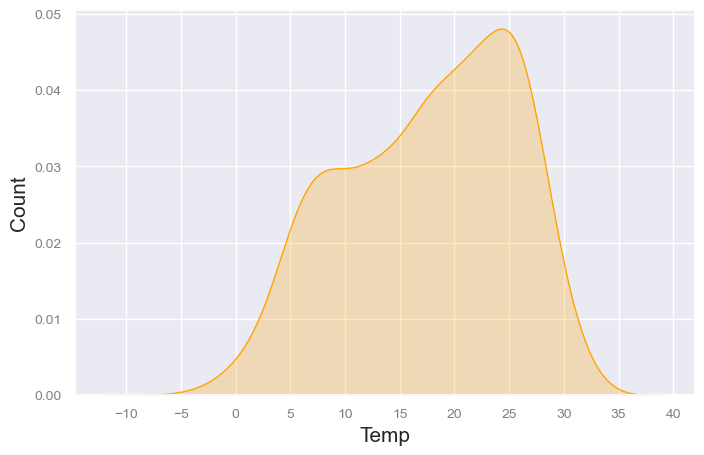

In [162]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(
    data=dd, x="temp", 
    weights="count", 
    # bins=np.arange(-10, 45, 5), 
    # binwidth=2, 
    # discrete=True,
    # element='step',
    color='orange',
    fill=True,
    ax=ax
)
ax.set_xticks(np.arange(-10, 45, 5))

plt.ylabel("Count")
plt.xlabel("Temp")

Text(0.5, 0, 'Temp')

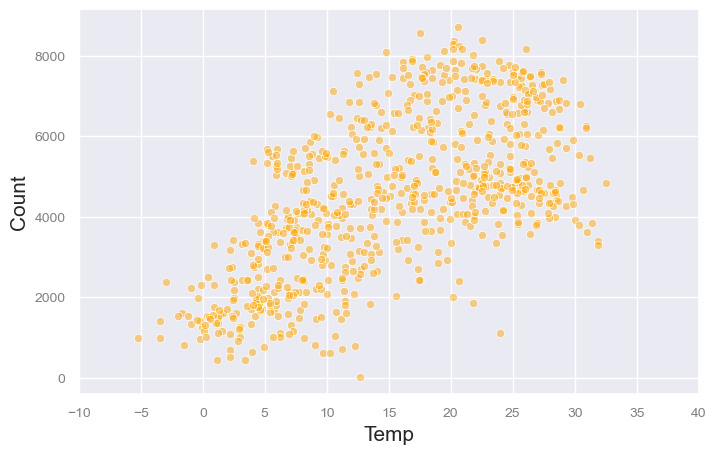

In [163]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(
    data=dd, 
    x="temp", 
    y='count',
    # bins=np.arange(-10, 45, 5), 
    # binwidth=2, 
    # discrete=True,
    # element='step',
    color='#ffa50077',
    # fill=True,
    ax=ax
)

ax.set_xticks(np.arange(-10, 45, 5))

plt.ylabel("Count")
plt.xlabel("Temp")

Text(0.5, 0, 'Feel Temp')

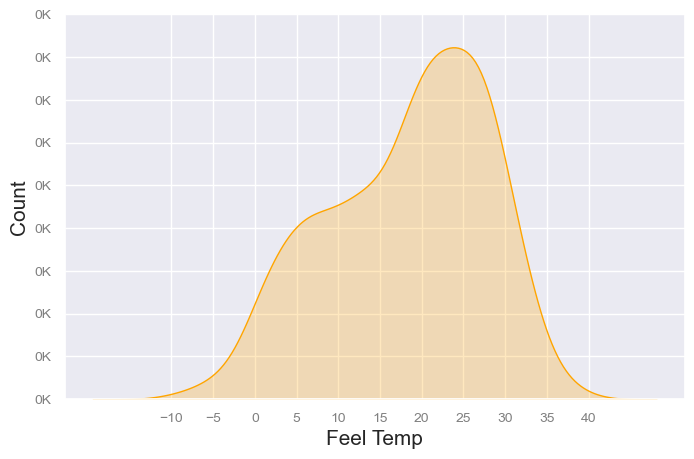

In [164]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(
    data=dd, x="atemp", 
    weights="count", 
    # bins=np.arange(-10, 45, 5), 
    # binwidth=5, 
    # discrete=True,
    # element='step',
    color='orange',
    fill=True,
    ax=ax
)
ax.set_xticks(np.arange(-10, 45, 5))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Feel Temp")

Text(0.5, 0, 'Wind Speed')

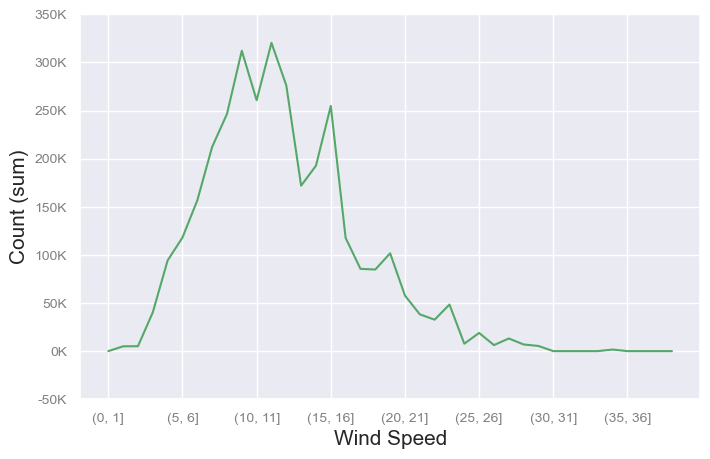

In [165]:
fig, ax = plt.subplots(figsize=(8, 5))

wind_bins = pd.cut(dd["windspeed"], np.arange(0, 40, 1))

dd.groupby(wind_bins)["count"].sum().plot(
    kind="line", color='g'
)

convert_to_k(ax)

plt.ylabel("Count (sum)")
plt.xlabel("Wind Speed")

Text(0.5, 0, 'Wind Speed')

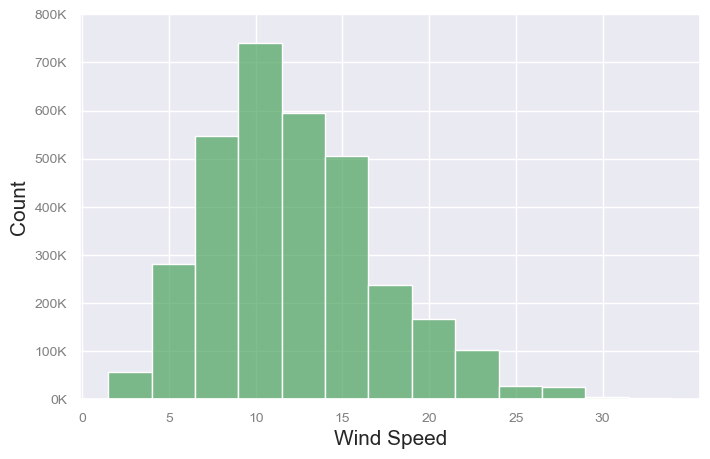

In [166]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, x="windspeed", 
    weights="count", 
    # bins=np.arange(0, 35, 2.5),
    binwidth=2.5, 
    # discrete=True,
    # element='poly',
    fill=True,
    color='g',
    ax=ax
)
ax.set_xticks(np.arange(0, 35, 5))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Wind Speed")

Text(0.5, 0, 'Humidity')

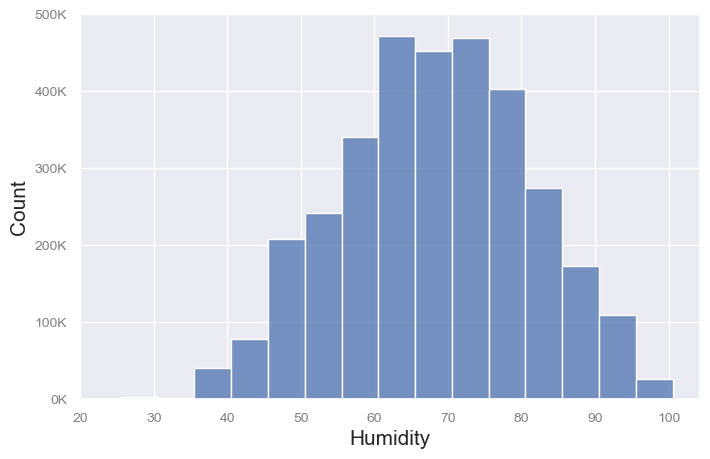

In [167]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, 
    x="hum", 
    weights="count", 
    # bins=np.arange(20, 100, 5), 
    binwidth=5, 
    # discrete=True,
    # element='step',
    # fill=True,
    color='b',
    ax=ax
)
ax.set_xticks(np.arange(20, 110, 10))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Humidity")

In [168]:
hd.describe()

,hour,temp,atemp,hum,windspeed,casual,registered,count,datetime,rain
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
mean,11.546752,15.358397,15.401157,68.638472,12.736540,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464,0.105892
min,0.000000,-7.060000,-16.000000,19.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00,0.000000
25%,6.000000,7.980000,5.997800,53.000000,7.001500,4.000000,34.000000,40.000000,2011-07-04 22:30:00,0.000000
50%,12.000000,15.500000,15.996800,70.000000,12.998000,17.000000,115.000000,142.000000,2012-01-02 21:00:00,0.000000
75%,18.000000,23.020000,24.999200,86.000000,16.997900,48.000000,220.000000,281.000000,2012-07-02 06:30:00,0.000000
max,23.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,2012-12-31 23:00:00,13.100000
std,6.914405,9.050138,11.342114,19.757955,8.196795,49.305030,151.357286,181.387599,NaN,0.484875


Text(0.5, 0, 'Rain')

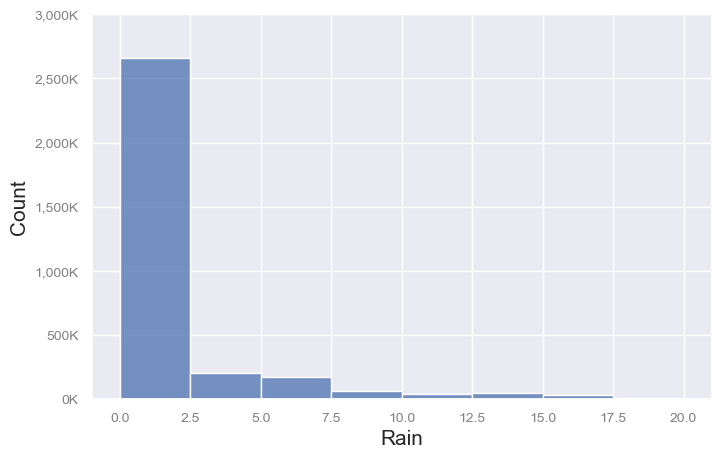

In [169]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, 
    x=dd[dd["rain"]<20]["rain"], 
    weights="count", 
    # estimator='mean',
    # bins=np.arange(0, 40, 2.5), 
    binwidth=2.5, 
    # discrete=True,
    # element='step',
    # fill=False,
    # errorbar=None,
    color='b',
    ax=ax
)
# ax.set_xticks(np.arange(0, 110, 10))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Rain")

In [170]:
dd[dd['rain'] > 50]

,date,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month,rain,snow,israin,issnow
238,2011-08-27,False,Saturday,False,23.960000,25.946696,94.83,25.166339,226,889,1115,Summer,Mist,August,54.1,0.00,True,False
250,2011-09-08,False,Thursday,True,21.793911,20.653826,97.00,12.914116,153,1689,1842,Fall,Mixed,September,53.3,0.00,True,False
340,2011-12-07,False,Wednesday,True,11.270000,10.416236,96.17,17.833725,50,655,705,Winter,Mixed,December,54.4,0.21,True,True
667,2012-10-29,False,Monday,True,12.680000,13.000400,94.00,23.999400,2,20,22,Fall,Mixed,October,83.6,0.00,True,False


In [171]:
hd[hd['datetime'] == '2012-10-29']


,hour,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month,datetime,rain,israin
15883,0,False,Monday,True,12.68,13.0004,94,23.9994,2,20,22,Fall,Mixed,October,2012-10-29,1.1,True


<Axes: >

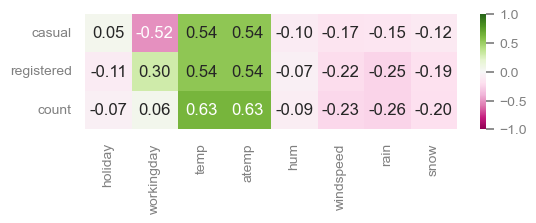

In [172]:
fig, ax = plt.subplots(figsize=(6, 1.5))

sns.heatmap(
        dd.corr(numeric_only=True).iloc[6:9, [0, 1, 2, 3, 4, 5, 9, 10]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

<Axes: >

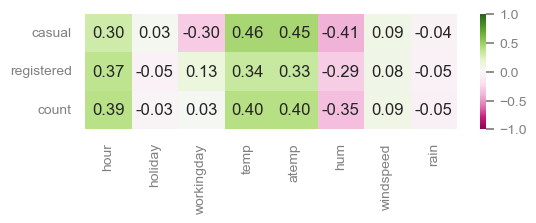

In [173]:
fig, ax = plt.subplots(figsize=(6, 1.5))

sns.heatmap(
        hd.corr(numeric_only=True).iloc[7:10, [0, 1, 2, 3, 4, 5, 6, 10]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)